# Tema 17: Visualizaciones

El análisis visual de los datos es discutiblemente uno de los aspectos más importantes del proceso analítico. En python existen múltiples librerías para generar visualizaciones informativas y hermosas, en esta libreta aprenderás los aspectos básicos de cómo utilizar dos de ellas `matplotlib` y `seaborn`.

Trabajaremos con los mismos datos que hemos estado analizando **palmer penguins**.

## Cargar librerías

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Importaciones listas')

Importaciones listas


## Carga de datos


In [15]:
url = 'https://raw.githubusercontent.com/raphaelvallat/pingouin/refs/heads/main/src/pingouin/datasets/penguins.csv'

df = pd.read_csv(url)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


## Análisis con matplotlib
Retomaremos la última figura del tema de [descriptivos básicos](tema-16-descriptivos-básicos.ipynb). Pudimos usar pandas para separar por color las tres especies pero no sabíamos cuál era cual. Retomaremos esto con `matplotlib`.

Por favor revisa los [acordeone](#acordeones-target) y la [documentación](https://matplotlib.org/stable/index.html) de la librería.

:::{important}
En particular revisa la guía de inicio rápido de `matplotlib` que puedes encontrar aquí: https://matplotlib.org/stable/users/explain/quick_start.html
:::

Primero, volvamos a hacer la gráfica sin color.

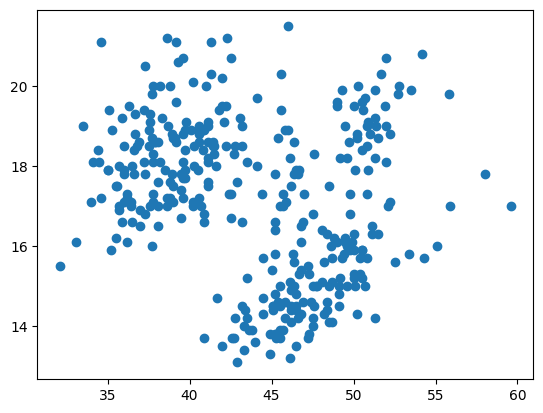

In [3]:
plt.scatter( # matplotlib también tiene una función para la gráfica de dispersión
    x=df['bill_length_mm'],
    y=df['bill_depth_mm'],
)

Podemos ver nuevamente los conglomerados, vamos a colorearlos, pero primero veamos el algoritmo de cómo lo vamos a hacer.

```{mermaid}
flowchart TD;
	A[Separar especies] -->
	B(Por cada una) --> 
	C[Generar dispersión] -->
	D[Dar color]
```

Sin embargo, primero entonces necesatamos saber cómo separar a las especies.

En `pandas` podemos generar un filtro de la siguiente manera:

```python
filtro = df[columna] == valor
filtrados = df[filtro]
```
Probémoslo seleccionando a los Gentoo.


In [4]:
es_gentoo = df['species'] == 'Gentoo'
gentoo = df[es_gentoo]
gentoo.head() 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,male
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male


Ahora veamos qué pasa si lo graficamos


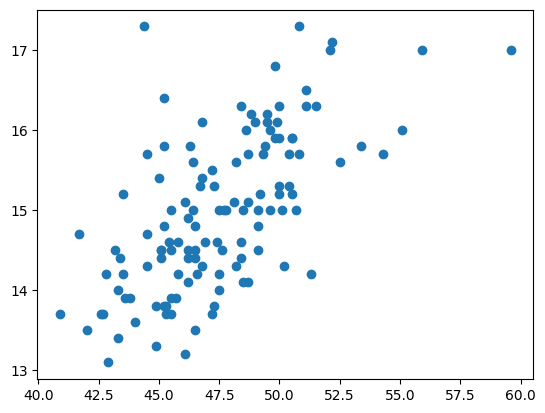

In [5]:
plt.scatter(
    x=gentoo['bill_length_mm'],
    y=gentoo['bill_depth_mm'],
)

Intenta buscar este patrón en el grafico de todas las especies.

Ahora apliquemos esto en un bucle `for`.

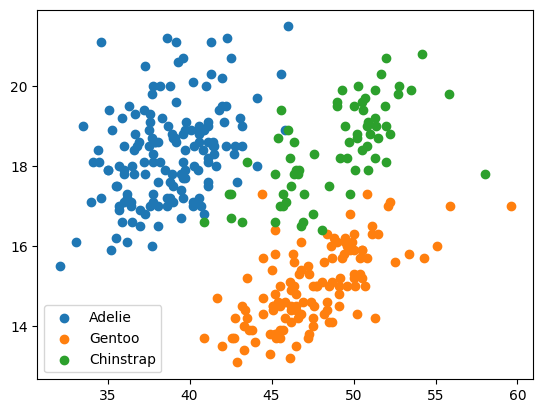

In [6]:
especies = ['Adelie', 'Gentoo', 'Chinstrap']
for especie in especies:
    filtro = df['species'] == especie
    datos_especie = df[filtro]
    plt.scatter(
        x=datos_especie['bill_length_mm'],
        y=datos_especie['bill_depth_mm'],
        label=especie, # paso clave
    )
    plt.legend() # le dice a matplotlib que ponga la leyenda.
# mira la magia

Como ves, a pesar de que generamos tres "gráficos" diferentes, uno por cada especie, en realidad todos se fueron a la misma figura.


## Análisis con seaborn
Ahora, solo para calentar motores, miremos como se ve esto con `seaborn`.


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

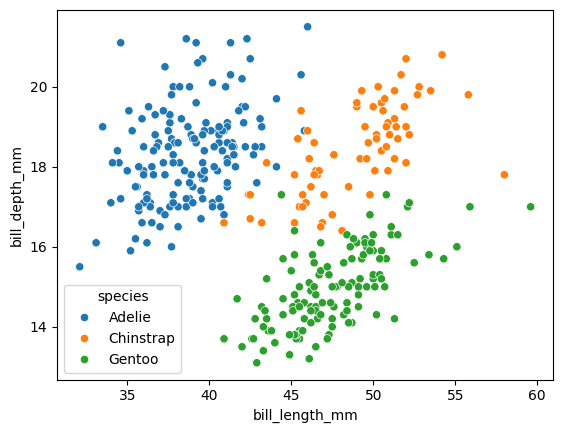

In [7]:
sns.scatterplot(
    data=df, # todos los datos
    x='bill_length_mm', # solo el nombre, no los datos
    y='bill_depth_mm', # igual
    hue='species' # columna para separar colores
)

Como ves `seaborn` abrevia en una sola función de fácil uso, lo que hicimos con `plt`. Incluso mejor, porque agrega los rótulos de los ejes, cosa que nosotros no hicimos con `plt`.

### Las cuatro principales

Seaborn ofrece tres funciones principales que concentran un enorme porcentaje de nuestras necesidades de visualización:

|Función|Documentación|Uso|
|---|---|---|
|`sns.relplot`|[liga](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)|Analizar la relación entre variables.|
|`sns.lmplot`|[liga](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)|Visualizar modelos de regresión lineal (GLM)|
|`sns.catplot`|[liga](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)|Visualizar variables categóricas y su relación con cuantitativas|
|`sns.displot`|[liga](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)|Visualizar distribuciones|

A continuación veremos solo algunos ejemplos de cómo utilizarlas.

Por favor revisa la documentación de cada una.

#### Relplot

Relplot ayuda a entender la relación entre varias variables. Es fenomenal para el análisis exploratorio.


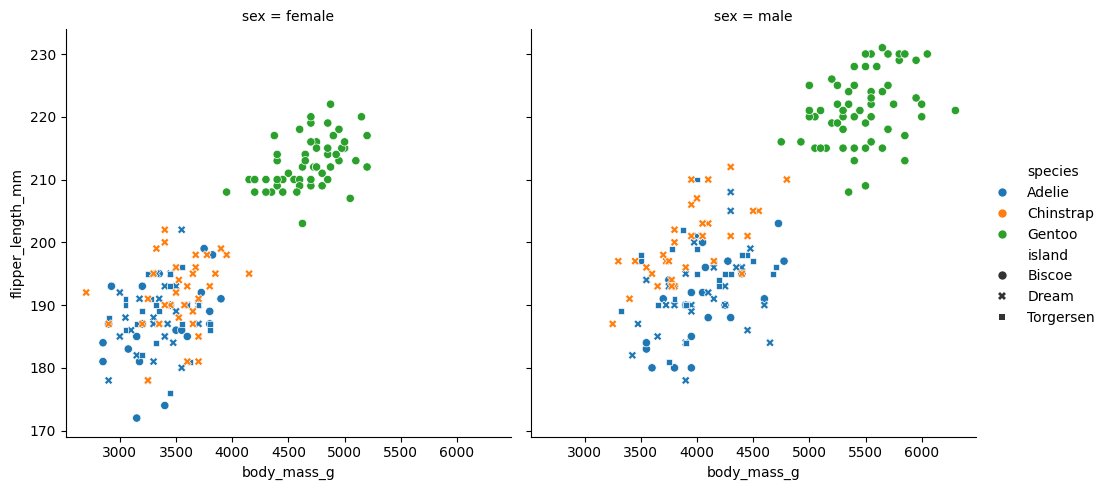

In [8]:
sns.relplot(
    data=df,
    x='body_mass_g',
    y='flipper_length_mm',
    hue='species',
    style='island',
    col='sex',
)

Observa como con una sola función obtenemos un montón de información. Vemos que los Gentoo, son generalmente más grandes y con aletas más grandes. En las tres especies existe dimorfismo sexual, los machos son en general más grandes, pero la diferencia es menos dramática en los Adelie y los Chinstrap. Además, podemos ver que los gentoo solo viven en Biscoe, mientras que los chinstrap solo viven en Dream, sin embargo, los Adelie viven en las tres islas.

#### LMplot

LMplot (linear model plot) ayuda a visualizar modelos regresivos. 
Por ejemplo, qué pasa si queremos averiguar el tamaño total del pingüino, con base en la medición de su pico, sexo y especie.

$peso \sim pico + sexo + especie$

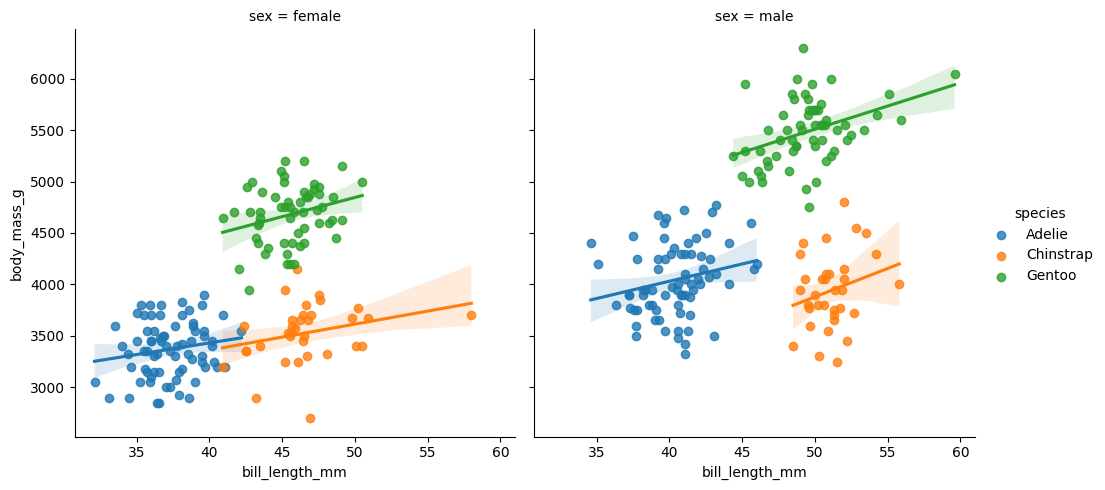

In [9]:
sns.lmplot(
    data=df,
    x='bill_length_mm',
    y='body_mass_g',
    hue='species',
    col='sex',
)

#### Catplot

Catplot nos ayuda a visualizar variables individuales y categorías.

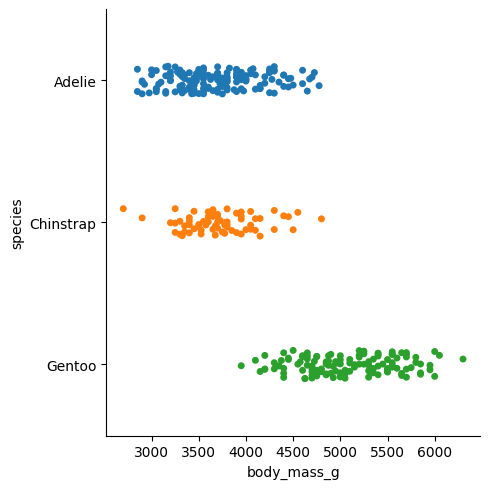

In [10]:
sns.catplot(
    data=df,
    x='body_mass_g',
    y='species',
    hue='species'
)

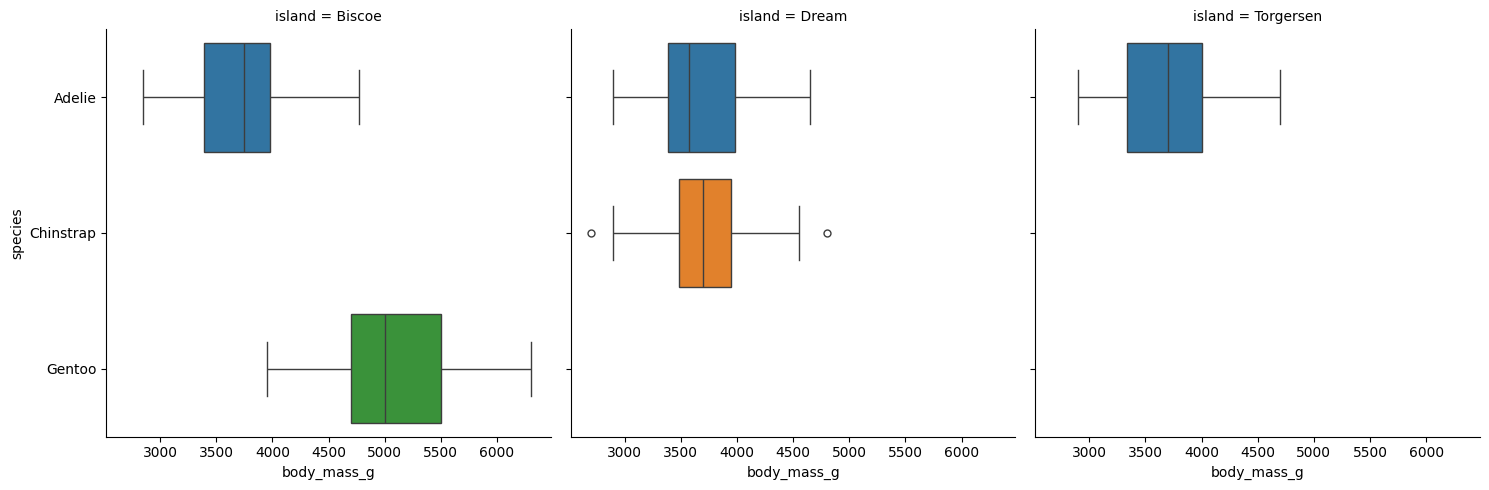

In [11]:
sns.catplot(
    data=df,
    x='body_mass_g',
    y='species',
    hue='species',
    kind='box',
    col='island'
)

#### Displot

Displot nos ayuda a visualizar distribuciones


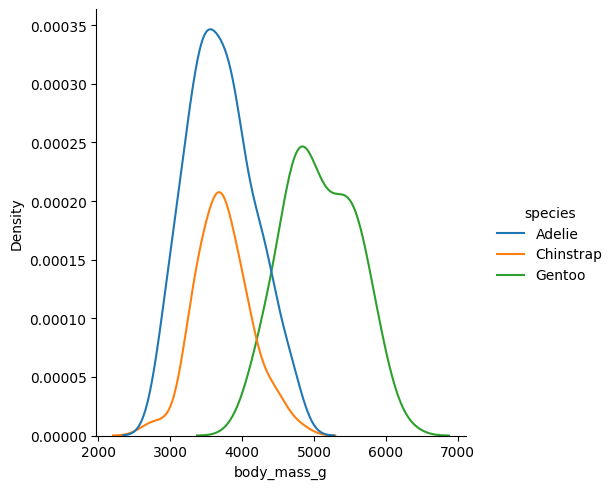

In [12]:
sns.displot(
    data=df,
    x='body_mass_g',
    hue='species',
    kind='kde',
)

También funciona con distribuciones bivariadas

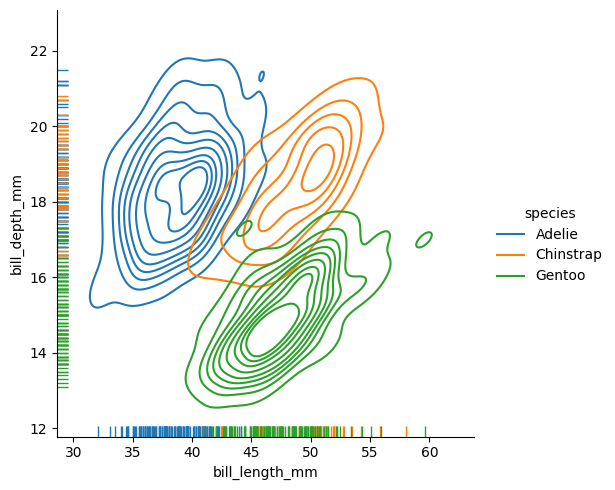

In [13]:
sns.displot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    rug=True,
    kind='kde',
)

Parece que los Adelíe tienen picos más cortos y anchos, mientras que los Gentoo tienen picos más angostos y largos, aunque los Chintrap se traslapa con las otras dos especies.


#### Más sobre seaborn

Seaborn tiene mucho más que ofrecer, pronto veremos más usos pero vale la pena que conozcas y domines estas cuatro funciones.

## Ejercicio

1. Revisa la documentación de `seaborn`. Particularmente su [galería](https://seaborn.pydata.org/examples/index.html) para que veas todo lo que puede hacer.
2. Intenta generar nuevos gráficos para continuar analizando el dataset de palmer penguins.